In [89]:
import matplotlib.pyplot as plt
import random



In [90]:
def insertion_sort(a):
   
    a = a.copy()
    steps = 0
    
    for i in range(1, len(a)):
        key = a[i] 
        steps += 1         
        j = i - 1 
        steps += 1          
        
       
        while j >= 0:
            steps += 1                
            steps += 1                
            if a[j] > key:
                a[j + 1] = a[j]; steps += 1 
                j -= 1; steps += 1          
            else:
                break
        
        if j < 0:
            steps += 1                 
        
        a[j + 1] = key; steps += 1     
        
    return a, steps




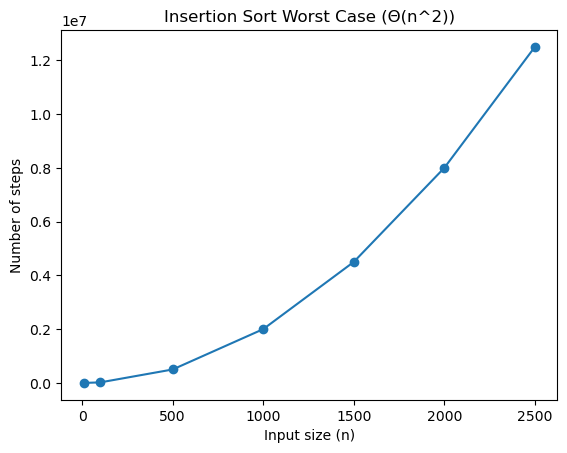

In [91]:
sizes = [10, 100, 500, 1000, 1500, 2000, 2500]
insertion_steps = []

for n in sizes:
    A = list(range(n, 0, -1))  
    _, steps = insertion_sort(A)  
    insertion_steps.append(steps)  

plt.plot(sizes, insertion_steps, marker="o")
plt.xlabel("Input size (n)")
plt.ylabel("Number of steps")
plt.title("Insertion Sort Worst Case (Θ(n^2))")
plt.show()

In [92]:
def merge_count(left, right):
  
    i = j = 0
    merged = []
    steps = 0
    
    while i < len(left) and j < len(right):
        steps += 1  
        steps += 1 
        if left[i] <= right[j]:
            merged.append(left[i]); steps += 1  
            i += 1; steps += 1                  
        else:
            merged.append(right[j]); steps += 1 
            j += 1; steps += 1                  
    
    while i < len(left):
        steps += 1
        merged.append(left[i]); steps += 1
        i += 1; steps += 1
        
    while j < len(right):
        steps += 1
        merged.append(right[j]); steps += 1
        j += 1; steps += 1
    
    return merged, steps

def merge_sort_count(a):
   
    n = len(a)
    if n <= 1:
        return a.copy(), 0
    
    mid = n // 2
    left_sorted, steps_left = merge_sort_count(a[:mid])
    right_sorted, steps_right = merge_sort_count(a[mid:])
    merged, steps_merge = merge_count(left_sorted, right_sorted)
    
    return merged, (steps_left + steps_right + steps_merge)




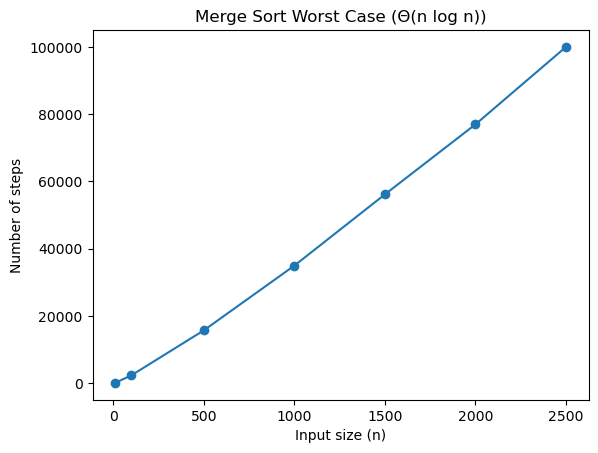

In [93]:
sizes = [10, 100, 500, 1000, 1500, 2000, 2500]
merge_steps = []

for n in sizes:
    A = list(range(n, 0, -1))  
    _, steps = merge_sort_count(A)  
    merge_steps.append(steps)  

plt.plot(sizes, merge_steps, marker="o")
plt.xlabel("Input size (n)")
plt.ylabel("Number of steps")
plt.title("Merge Sort Worst Case (Θ(n log n))")
plt.show()

In [94]:
def PARTITION(A, p, r):
    steps = 0
    x = A[r]
    i = p - 1
    steps += 2

    for j in range(p, r):
        steps += 1
        if A[j] <= x:
            i = i + 1
            A[i], A[j] = A[j], A[i]
            steps += 2

    A[i + 1], A[r] = A[r], A[i + 1]
    steps += 1
    return i + 1, steps

def QUICKSORT(A, p, r):
    steps = 1
    if p < r:
        q, part_steps = PARTITION(A, p, r)
        steps += part_steps
        steps += QUICKSORT(A, p, q - 1)
        steps += QUICKSORT(A, q + 1, r)
    return steps


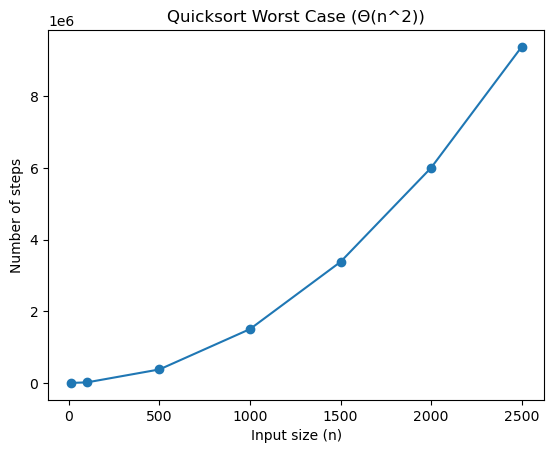

In [95]:
sizes = [10, 100, 500, 1000, 1500, 2000, 2500]
quick_steps = []

for n in sizes:
    A = list(range(n)) 
    steps = QUICKSORT(A, 0, len(A) - 1)
    quick_steps.append(steps)
    

plt.plot(sizes, quick_steps, marker="o")
plt.xlabel("Input size (n)")
plt.ylabel("Number of steps")
plt.title("Quicksort Worst Case (Θ(n^2))")
plt.show()

In [96]:
def MAX_HEAPIFY(A, i, heap_size):
    steps = 0

    l = 2*i + 1
    r = 2*i + 2
    steps += 2

    if l < heap_size and A[l] > A[i]:
        largest = l
        steps += 1
    else:
        largest = i
        steps += 1

    if r < heap_size and A[r] > A[largest]:
        largest = r
        steps += 1

    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        steps += 1
        steps += MAX_HEAPIFY(A, largest, heap_size)

    return steps


def BUILD_MAX_HEAP(A):
    steps = 0
    heap_size = len(A)

    for i in range(len(A)//2 - 1, -1, -1):
        steps += MAX_HEAPIFY(A, i, heap_size)

    return heap_size, steps



def HEAPSORT(A):
    steps = 0
    heap_size, build_steps = BUILD_MAX_HEAP(A)
    steps += build_steps

    for i in range(len(A)-1, 0, -1):
        A[0], A[i] = A[i], A[0]
        steps += 1
        heap_size -= 1
        steps += MAX_HEAPIFY(A, 0, heap_size)

    return steps


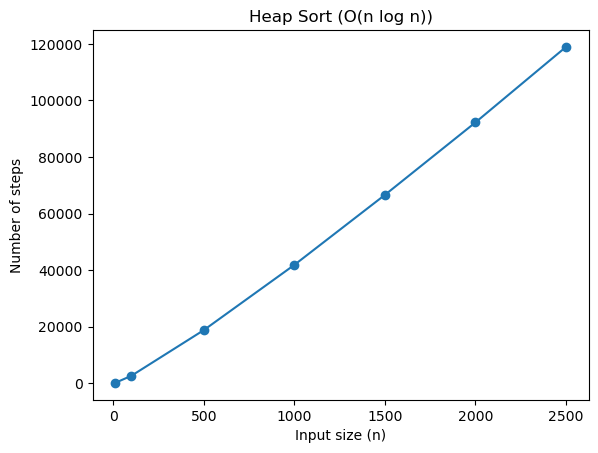

In [97]:
sizes = [10, 100, 500, 1000, 1500, 2000, 2500]
heap_steps = []

for n in sizes:
    A = list(range(n))
    random.shuffle(A)

    steps = HEAPSORT(A)
    heap_steps.append(steps)

plt.plot(sizes, heap_steps, marker="o")
plt.xlabel("Input size (n)")
plt.ylabel("Number of steps")
plt.title("Heap Sort (O(n log n))")
plt.show()

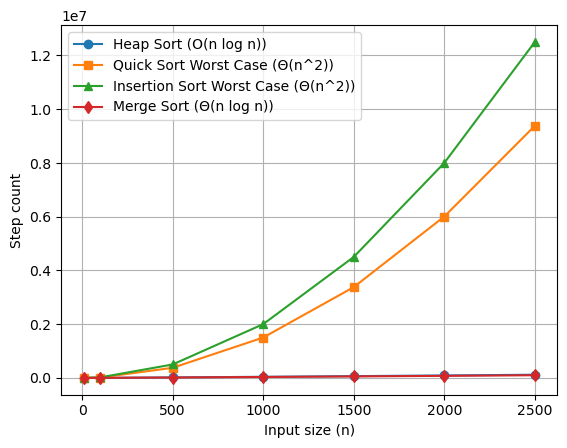

In [98]:
plt.plot(sizes, heap_steps, marker="o", label="Heap Sort (O(n log n))")
plt.plot(sizes, quick_steps, marker="s", label="Quick Sort Worst Case (Θ(n^2))")
plt.plot(sizes, insertion_steps, marker="^", label="Insertion Sort Worst Case (Θ(n^2))")  
plt.plot(sizes, merge_steps, marker="d", label="Merge Sort (Θ(n log n))")

plt.xlabel("Input size (n)")
plt.ylabel("Step count")
plt.legend()
plt.grid(True)
plt.show()